In [1]:
import sys
sys.path.append("..")
import cuqi
import numpy as np

# cil imports
from cil.framework import ImageGeometry
from cil.framework import AcquisitionGeometry
from cil.plugins import TomoPhantom
from cil.utilities.display import show2D


Failed to import arviz
3rd party engines available for cuqi: astra cil


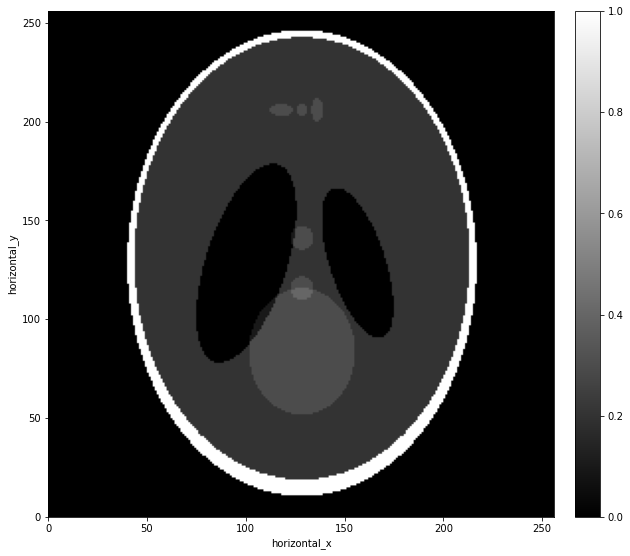

In [2]:
# number of pixels
n_pixels = 256

# Angles
angles = np.linspace(0, 180, 180, endpoint=False, dtype=np.float32)


# Setup acquisition geometry
# with sufficient number of projections
ag = AcquisitionGeometry.create_Parallel2D()\
                            .set_angles(angles)\
                            .set_panel(300, pixel_size=1/n_pixels)

# Setup image geometry
ig = ImageGeometry(voxel_num_x=n_pixels, 
                   voxel_num_y=n_pixels, 
                   voxel_size_x=1/n_pixels, 
                   voxel_size_y=1/n_pixels)

# Get phantom
phantom = TomoPhantom.get_ImageData(num_model=1, geometry=ig)
show2D(phantom)

from cil.plugins.tigre import ProjectionOperator
ProjOp = ProjectionOperator(ig, ag)

In [3]:
model = cuqi.cil.model.cilBase(ig, ag)

In [ ]:
sino = model.forward(phantom.as_array().flatten())
sino.plot()

In [1]:
bp = model.adjoint(sino)
bp.plot()

NameError: name 'model' is not defined

In [6]:
sino

CUQIarray: NumPy array wrapped with geometry.
---------------------------------------------

Geometry:
 cilAcquisitionGeometry(180, 300)

Parameters:
 False

Array:
CUQIarray([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [10]:
likelihood = cuqi.distribution.GaussianCov(mean=model, cov=0.05).to_likelihood(sino)
prior = cuqi.distribution.GaussianCov(mean = np.zeros(model.domain_dim), cov = 1)

posterior = cuqi.distribution.Posterior(likelihood=likelihood, prior = prior)

sampler = cuqi.sampler.Linear_RTO(posterior)

In [ ]:
sino

In [11]:
bp

CUQIarray: NumPy array wrapped with geometry.
---------------------------------------------

Geometry:
 cilImageGeometry(256, 256)

Parameters:
 False

Array:
CUQIarray([10.965726, 11.013885, 11.081195, ..., 10.531182, 10.500729,
           10.462341], dtype=float32)